In [1]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()

'/home/ping/code/public-health/stackoverflow/notebook'

In [3]:
csv_path = '/home/ping/code/public-health/stackoverflow/data'

In [4]:
data = pd.read_csv(os.path.join(csv_path,'QueryResults.csv'))

In [5]:
data.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,Import CSV file to strongly typed data structu...,<p>What's the best way to import a CSV file in...,<c#><vb.net><file><csv><import>,1898,109,69257,28,11
1,Change hash without reload in jQuery,<p>I have the following code:</p>\n\n<pre><cod...,<jquery><hash><reload><fragment-identifier><wi...,1939041,56,113780,14,5
2,Pass by reference or pass by value?,"<p>When learning a new programming language, o...",<language-agnostic><oop><parameters><pass-by-r...,2027,52,18382,19,11
3,What are MVP and MVC and what is the difference?,"<p>When looking beyond the <a href=""https://en...",<user-interface><model-view-controller><design...,2056,2319,550884,1357,24
4,LINQ on the .NET 2.0 Runtime,<p>Can a LINQ enabled app run on a machine tha...,<.net><linq><.net-3.5><.net-2.0><clr>,2138,61,56573,13,8


In [6]:
data.shape

(27933, 8)

In [7]:
data = data.sample(3000)

In [8]:
data.shape

(3000, 8)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 12913 to 13108
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          3000 non-null   object
 1   Body           3000 non-null   object
 2   Tags           3000 non-null   object
 3   Id             3000 non-null   int64 
 4   Score          3000 non-null   int64 
 5   ViewCount      3000 non-null   int64 
 6   FavoriteCount  3000 non-null   int64 
 7   AnswerCount    3000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 210.9+ KB


In [10]:
data.dtypes.value_counts()

int64     5
object    3
dtype: int64

In [11]:
data.nunique()

Title            3000
Body             3000
Tags             2995
Id               3000
Score             427
ViewCount        2966
FavoriteCount     228
AnswerCount        50
dtype: int64

In [12]:
tmp = data.nunique()
tmp

Title            3000
Body             3000
Tags             2995
Id               3000
Score             427
ViewCount        2966
FavoriteCount     228
AnswerCount        50
dtype: int64

In [13]:
tmp[tmp<10]

Series([], dtype: int64)

In [14]:
tmp[tmp >1000]

Title        3000
Body         3000
Tags         2995
Id           3000
ViewCount    2966
dtype: int64

In [15]:
## NaN and Duplicates

In [16]:
data.isna().sum()

Title            0
Body             0
Tags             0
Id               0
Score            0
ViewCount        0
FavoriteCount    0
AnswerCount      0
dtype: int64

In [17]:
data.isna().mean().sort_values()

Title            0.0
Body             0.0
Tags             0.0
Id               0.0
Score            0.0
ViewCount        0.0
FavoriteCount    0.0
AnswerCount      0.0
dtype: float64

<AxesSubplot:>

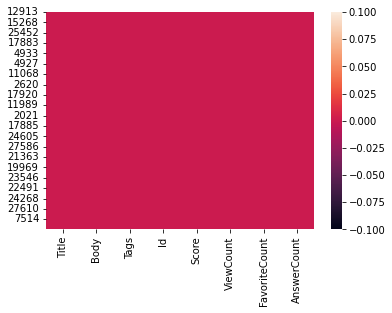

In [18]:
sns.heatmap(data.isna())

<AxesSubplot:>

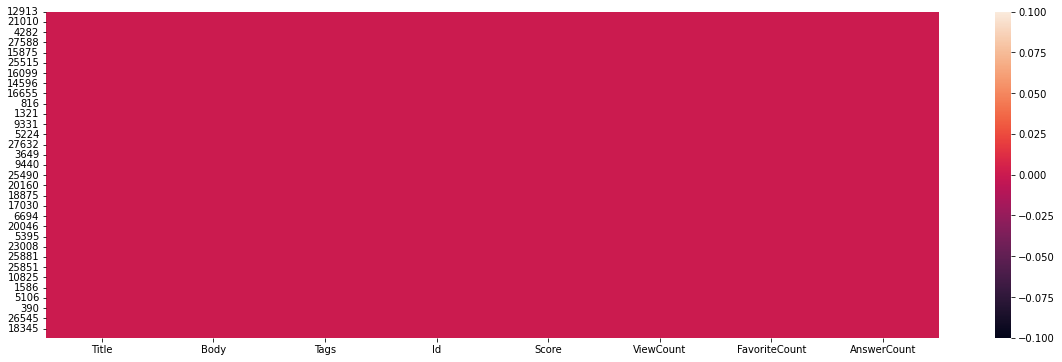

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(20,6))
sns.heatmap(data.isna())

In [20]:
data.duplicated().sum()

0

In [21]:
data.duplicated(subset ="Body").sum()

0

In [22]:
for col in data.columns:
    n = data.duplicated(subset=col).sum()
    print(f"col:{col} -> duplicated:{n}")

col:Title -> duplicated:0
col:Body -> duplicated:0
col:Tags -> duplicated:5
col:Id -> duplicated:0
col:Score -> duplicated:2573
col:ViewCount -> duplicated:34
col:FavoriteCount -> duplicated:2772
col:AnswerCount -> duplicated:2950


In [23]:
data.duplicated(subset="Tags", keep="first")

12913    False
12204    False
642      False
24282    False
15399    False
         ...  
11974    False
18726    False
14825    False
20952    False
13108    False
Length: 3000, dtype: bool

In [24]:
idx = data.duplicated(subset="Tags", keep ="first")
data.loc[idx, :].sort_values("Tags")

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
21569,How to set default page asp.net,"<p>I've just published my site in my server, b...",<asp.net><.net><asp.net-mvc><asp.net-core><.ne...,18002744,40,111021,11,2
8266,Google Firestore - How to get several document...,<p>I am wondering if it's possible to get mult...,<javascript><node.js><firebase><google-cloud-p...,46721517,174,80760,40,17
27509,How do I add a new column to a Spark DataFrame...,<p>I have a Spark DataFrame (using PySpark 1.5...,<python><apache-spark><dataframe><pyspark><apa...,33681487,176,443678,66,10
22950,record the computation time for each epoch in ...,<p>I want to compare the computation time betw...,<python><machine-learning><neural-network><dee...,43178668,32,20044,11,3
1117,How to get plain text out of Wikipedia,<p>I'd like to write a script that gets the Wi...,<python><mediawiki><wikipedia><wikipedia-api><...,4452102,37,58020,20,13


In [25]:
## Data inspection
data.describe(include=np.number)

,Id,Score,ViewCount,FavoriteCount,AnswerCount
count,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000
mean,1.668109e+07,116.921000,1.115768e+05,45.332000,7.204667
std,1.550511e+07,544.359768,2.220019e+05,232.633534,6.640493
min,1.100000e+01,6.000000,8.510000e+02,11.000000,1.000000
25%,4.146656e+06,28.750000,2.155225e+04,14.000000,3.000000
50%,1.158880e+07,50.000000,4.890850e+04,19.000000,5.000000
75%,2.572391e+07,100.000000,1.095912e+05,34.000000,9.000000
max,7.191786e+07,26631.000000,4.580670e+06,11654.000000,64.000000


In [26]:
data.describe(include=object)

,Title,Body,Tags
count,3000,3000,3000
unique,3000,3000,2995
top,What is the correct way to write HTML using Ja...,<p>It seems that experienced web developers fr...,<python><apache-spark><dataframe><pyspark><apa...
freq,1,1,2


In [27]:
## Cleaning
## select columns

In [28]:
tmp =data.dtypes
tmp

Title            object
Body             object
Tags             object
Id                int64
Score             int64
ViewCount         int64
FavoriteCount     int64
AnswerCount       int64
dtype: object

In [29]:
cols = ["Title", "Body", "Tags"]
df = data[cols]
df.head()

,Title,Body,Tags
12913,What is the correct way to write HTML using Ja...,<p>It seems that experienced web developers fr...,<javascript><html><dynamic><code-generation><d...
12204,Peculiar overload resolution with while (true),<p>I was implementing sync/async overloads whe...,<c#><.net><lambda><overloading><overload-resol...
642,NSOperation on the iPhone,<p>I've been looking for some concrete scenari...,<iphone><objective-c><cocoa-touch><multithread...
24282,Reducing size of pyinstaller exe,<p>I have a simple pandas pyinstaller exe whic...,<python><pandas><selenium><selenium-webdriver>...
15399,How to check if my string is equal to null?,<p>I want to perform some action ONLY IF my st...,<java><string><null><equals><conditional-opera...


In [30]:
# Nettoyage du texte

In [31]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [32]:
def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

In [33]:
# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

In [34]:
# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

In [35]:
# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

In [36]:
# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [37]:
# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

In [38]:
# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [39]:
df['sentence_bow'] = df['Body'].apply(lambda x : transform_bow_fct(x))

/tmp/ipykernel_712/3099865619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence_bow'] = df['Body'].apply(lambda x : transform_bow_fct(x))


In [40]:
#!pip install spacy

In [41]:
#! python -m spacy download en_core_web_sm

In [42]:
import spacy
import en_core_web_sm

2022-11-04 12:45:59.700616: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-04 12:45:59.700781: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-04 12:45:59.700805: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PingLapTop): /proc/driver/nvidia/version does not exist


In [43]:
nlp_en = en_core_web_sm.load()

/home/ping/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/spacy/language.py:1895: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


In [44]:
#df['sentence_bow_lem'] = df['Body'].apply(lambda x : transform_bow_lem_fct(x))

In [45]:
#test = df.head(10)

In [46]:
#test['sentence_bow_lem'] = test['sentence_bow'].apply(lambda x : " ".join([token.lemma_ for token in nlp_en(x)
                                                                  #if(token.pos_ in["NOUN","PROPN"])
                                                                  #]))

In [47]:
df['sentence_bow_lem'] = df['sentence_bow'].apply(lambda x : " ".join([token.lemma_ for token in nlp_en(x)
                                                                  if(token.pos_ in["NOUN","PROPN"])
                                                                  ]))

/tmp/ipykernel_712/3868457659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence_bow_lem'] = df['sentence_bow'].apply(lambda x : " ".join([token.lemma_ for token in nlp_en(x)


In [48]:
df

,Title,Body,Tags,sentence_bow,sentence_bow_lem
12913,What is the correct way to write HTML using Ja...,<p>It seems that experienced web developers fr...,<javascript><html><dynamic><code-generation><d...,seems experienced web developers frown upon us...,web developer code document.write code javascr...
12204,Peculiar overload resolution with while (true),<p>I was implementing sync/async overloads whe...,<c#><.net><lambda><overloading><overload-resol...,implementing sync async overloads came across ...,sync async overload situation expression param...
642,NSOperation on the iPhone,<p>I've been looking for some concrete scenari...,<iphone><objective-c><cocoa-touch><multithread...,'ve looking concrete scenarios code nsoperatio...,scenario nsoperation code iphone tool applicat...
24282,Reducing size of pyinstaller exe,<p>I have a simple pandas pyinstaller exe whic...,<python><pandas><selenium><selenium-webdriver>...,simple pandas pyinstaller exe 40mb. exe exampl...,panda pyinstaller exe mb exe example import co...
15399,How to check if my string is equal to null?,<p>I want to perform some action ONLY IF my st...,<java><string><null><equals><conditional-opera...,want perform action only string meaningful val...,perform action value pre code mystring.equal c...
...,...,...,...,...,...
11974,"How to eliminate the ""maven-enforcer-plugin (g...",<p>I am configuring a multi-module parent chil...,<eclipse><maven><maven-3><m2eclipse><m2e>,configuring multi module parent child maven pr...,multi module parent child maven project maven ...
18726,Merge two dataframes by index,<p>I have the following dataframes:</p>\n<pre>...,<python><pandas><dataframe><merge><concat>,following dataframes pre code df1 begin condit...,dataframe pre code df1 confidence df2 concept ...
14825,"Inherit from a generic base class, apply a con...",<p>This is a syntax question. I have a generic...,<c#><generics><inheritance><interface><constra...,this syntax question generic class inheriting ...,syntax question class base class constraint ty...
20952,How does weak_ptr work?,<p>I understand how to use <code>weak_ptr</cod...,<c++><boost><weak-references><tr1><weak-ptr>,understand use code weak_ptr code code shared_...,use code weak_ptr code code shared_ptr code co...


In [49]:
df['clean_tag'] = df['Tags'].apply(lambda x : transform_dl_fct(x))
df.shape

/tmp/ipykernel_712/2478937032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_tag'] = df['Tags'].apply(lambda x : transform_dl_fct(x))


(3000, 6)

In [50]:
df['clean_tag_lem'] = df['clean_tag'].apply(lambda x : " ".join([token.lemma_ for token in nlp_en(x)
                                                                  if(token.pos_ in["NOUN","PROPN"])
                                                                  ]))

/tmp/ipykernel_712/2823198897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_tag_lem'] = df['clean_tag'].apply(lambda x : " ".join([token.lemma_ for token in nlp_en(x)


In [51]:
df

,Title,Body,Tags,sentence_bow,sentence_bow_lem,clean_tag,clean_tag_lem
12913,What is the correct way to write HTML using Ja...,<p>It seems that experienced web developers fr...,<javascript><html><dynamic><code-generation><d...,seems experienced web developers frown upon us...,web developer code document.write code javascr...,< javascript > < html > < dynamic > < code gen...,javascript html code generation
12204,Peculiar overload resolution with while (true),<p>I was implementing sync/async overloads whe...,<c#><.net><lambda><overloading><overload-resol...,implementing sync async overloads came across ...,sync async overload situation expression param...,< c > < .net > < lambda > < overloading > < ov...,.net overload resolution
642,NSOperation on the iPhone,<p>I've been looking for some concrete scenari...,<iphone><objective-c><cocoa-touch><multithread...,'ve looking concrete scenarios code nsoperatio...,scenario nsoperation code iphone tool applicat...,< iphone > < objective c > < cocoa touch > < m...,iphone objective c cocoa touch nsoperation
24282,Reducing size of pyinstaller exe,<p>I have a simple pandas pyinstaller exe whic...,<python><pandas><selenium><selenium-webdriver>...,simple pandas pyinstaller exe 40mb. exe exampl...,panda pyinstaller exe mb exe example import co...,< python > < pandas > < selenium > < selenium ...,selenium selenium webdriver
15399,How to check if my string is equal to null?,<p>I want to perform some action ONLY IF my st...,<java><string><null><equals><conditional-opera...,want perform action only string meaningful val...,perform action value pre code mystring.equal c...,< java > < string > < null > < equals > < cond...,string operator
...,...,...,...,...,...,...,...
11974,"How to eliminate the ""maven-enforcer-plugin (g...",<p>I am configuring a multi-module parent chil...,<eclipse><maven><maven-3><m2eclipse><m2e>,configuring multi module parent child maven pr...,multi module parent child maven project maven ...,< eclipse > < maven > < maven 3 > < m2eclipse ...,eclipse m2eclipse m2e
18726,Merge two dataframes by index,<p>I have the following dataframes:</p>\n<pre>...,<python><pandas><dataframe><merge><concat>,following dataframes pre code df1 begin condit...,dataframe pre code df1 confidence df2 concept ...,< python > < pandas > < dataframe > < merge > ...,concat
14825,"Inherit from a generic base class, apply a con...",<p>This is a syntax question. I have a generic...,<c#><generics><inheritance><interface><constra...,this syntax question generic class inheriting ...,syntax question class base class constraint ty...,< c > < generics > < inheritance > < interface...,generic inheritance interface constraint
20952,How does weak_ptr work?,<p>I understand how to use <code>weak_ptr</cod...,<c++><boost><weak-references><tr1><weak-ptr>,understand use code weak_ptr code code shared_...,use code weak_ptr code code shared_ptr code co...,< c > < boost > < weak references > < tr1 > < ...,reference ptr


In [52]:
## Drop NaN

In [53]:
df.isna().mean()

Title               0.0
Body                0.0
Tags                0.0
sentence_bow        0.0
sentence_bow_lem    0.0
clean_tag           0.0
clean_tag_lem       0.0
dtype: float64

In [54]:
## Duplicated

In [55]:
df.shape

(3000, 7)

In [56]:
idx = df.duplicated(subset="Tags", keep="first")
df.loc[idx, :].sort_values("Tags")

,Title,Body,Tags,sentence_bow,sentence_bow_lem,clean_tag,clean_tag_lem
21569,How to set default page asp.net,"<p>I've just published my site in my server, b...",<asp.net><.net><asp.net-mvc><asp.net-core><.ne...,'ve published site server type browser www.mys...,site server type browser error http error web ...,< asp.net > < .net > < asp.net mvc > < asp.net...,.net mvc asp.net core .net core
8266,Google Firestore - How to get several document...,<p>I am wondering if it's possible to get mult...,<javascript><node.js><firebase><google-cloud-p...,wondering possible get multiple documents list...,document list trip network call firestore data...,< javascript > < node.js > < firebase > < goog...,javascript firebase google cloud platform goog...
27509,How do I add a new column to a Spark DataFrame...,<p>I have a Spark DataFrame (using PySpark 1.5...,<python><apache-spark><dataframe><pyspark><apa...,spark dataframe using pyspark 1.5.1 would like...,spark dataframe pyspark column success pre cod...,< python > < apache spark > < dataframe > < py...,apache spark pyspark apache spark sql
22950,record the computation time for each epoch in ...,<p>I want to compare the computation time betw...,<python><machine-learning><neural-network><dee...,want compare computation time different models...,computation time model computation time epoch ...,< python > < machine learning > < neural netwo...,python machine learning network learning
1117,How to get plain text out of Wikipedia,<p>I'd like to write a script that gets the Wi...,<python><mediawiki><wikipedia><wikipedia-api><...,like write script gets wikipedia description s...,write script wikipedia description section bla...,< python > < mediawiki > < wikipedia > < wikip...,wikipedia api mediawiki api


In [57]:
df.drop_duplicates(subset = "Tags", inplace = True)

/home/ping/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [58]:
## Length

In [59]:
df.describe(include = "object")

,Title,Body,Tags,sentence_bow,sentence_bow_lem,clean_tag,clean_tag_lem
count,2995,2995,2995,2995,2995,2995,2995
unique,2995,2995,2995,2995,2995,2995,2860
top,What is the correct way to write HTML using Ja...,<p>It seems that experienced web developers fr...,<javascript><html><dynamic><code-generation><d...,seems experienced web developers frown upon us...,web developer code document.write code javascr...,< javascript > < html > < dynamic > < code gen...,
freq,1,1,1,1,1,1,41


In [60]:
df.Title.apply(lambda i : len(i))

12913    55
12204    46
642      25
24282    32
15399    43
         ..
11974    99
18726    29
14825    87
20952    23
13108    42
Name: Title, Length: 2995, dtype: int64

In [61]:
df.Body.apply(lambda i : len(i))

12913     194
12204     834
642       526
24282    1886
15399    1022
         ... 
11974    2168
18726    1609
14825     841
20952     359
13108     389
Name: Body, Length: 2995, dtype: int64

In [62]:
df.Tags.apply(lambda i:len(i))

12913    60
12204    52
642      63
24282    59
15399    50
         ..
11974    41
18726    42
14825    51
20952    44
13108    45
Name: Tags, Length: 2995, dtype: int64

/home/ping/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Title'>

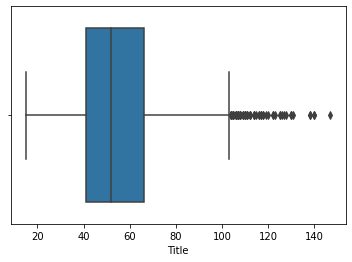

In [63]:
tmp1 = df.Title.str.len()
sns.boxplot(tmp1)

/home/ping/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Body'>

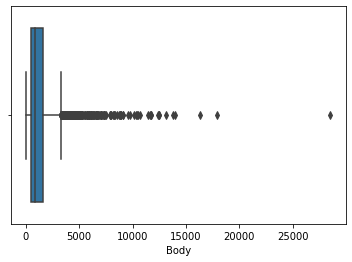

In [64]:
tmp2 = df.Body.str.len()
sns.boxplot(tmp2)

/home/ping/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tags'>

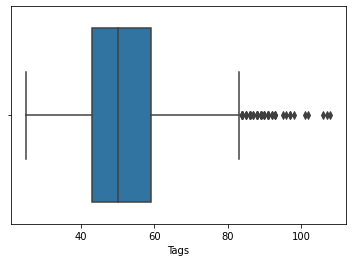

In [65]:
tmp3 = df.Tags.str.len()
sns.boxplot(tmp3)

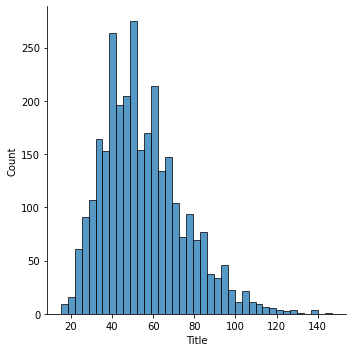

In [66]:
sns.displot(tmp1)

In [67]:
df["_len_Title"]=tmp1

/tmp/ipykernel_712/2439902309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["_len_Title"]=tmp1


In [68]:
df["_len_Body"]=tmp2

/tmp/ipykernel_712/1139910994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["_len_Body"]=tmp2


In [69]:
df["_len_Tags"]=tmp3

/tmp/ipykernel_712/2381150020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["_len_Tags"]=tmp3


In [70]:
df.head()

,Title,Body,Tags,sentence_bow,sentence_bow_lem,clean_tag,clean_tag_lem,_len_Title,_len_Body,_len_Tags
12913,What is the correct way to write HTML using Ja...,<p>It seems that experienced web developers fr...,<javascript><html><dynamic><code-generation><d...,seems experienced web developers frown upon us...,web developer code document.write code javascr...,< javascript > < html > < dynamic > < code gen...,javascript html code generation,55,194,60
12204,Peculiar overload resolution with while (true),<p>I was implementing sync/async overloads whe...,<c#><.net><lambda><overloading><overload-resol...,implementing sync async overloads came across ...,sync async overload situation expression param...,< c > < .net > < lambda > < overloading > < ov...,.net overload resolution,46,834,52
642,NSOperation on the iPhone,<p>I've been looking for some concrete scenari...,<iphone><objective-c><cocoa-touch><multithread...,'ve looking concrete scenarios code nsoperatio...,scenario nsoperation code iphone tool applicat...,< iphone > < objective c > < cocoa touch > < m...,iphone objective c cocoa touch nsoperation,25,526,63
24282,Reducing size of pyinstaller exe,<p>I have a simple pandas pyinstaller exe whic...,<python><pandas><selenium><selenium-webdriver>...,simple pandas pyinstaller exe 40mb. exe exampl...,panda pyinstaller exe mb exe example import co...,< python > < pandas > < selenium > < selenium ...,selenium selenium webdriver,32,1886,59
15399,How to check if my string is equal to null?,<p>I want to perform some action ONLY IF my st...,<java><string><null><equals><conditional-opera...,want perform action only string meaningful val...,perform action value pre code mystring.equal c...,< java > < string > < null > < equals > < cond...,string operator,43,1022,50


In [71]:
# Multivariate analysis

In [72]:
corr = df.corr()
corr

,_len_Title,_len_Body,_len_Tags
_len_Title,1.000000,0.142663,0.089501
_len_Body,0.142663,1.000000,0.065088
_len_Tags,0.089501,0.065088,1.000000


<AxesSubplot:>

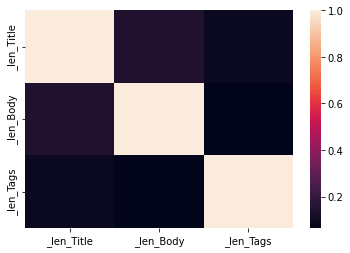

In [73]:
sns.heatmap(corr)

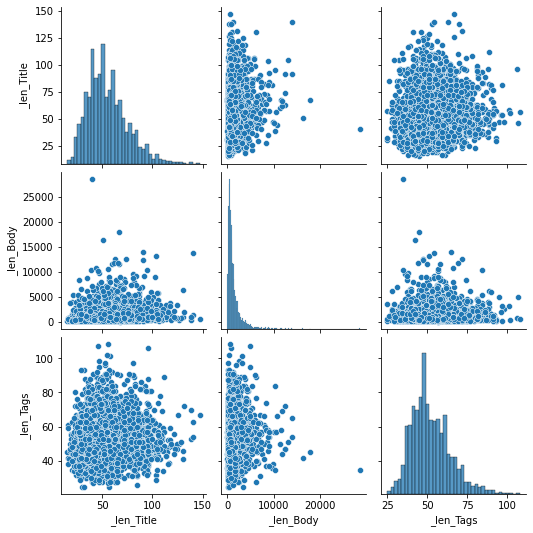

In [74]:
sns.pairplot(df)

In [75]:
df.sort_values("_len_Body").head(10)

,Title,Body,Tags,sentence_bow,sentence_bow_lem,clean_tag,clean_tag_lem,_len_Title,_len_Body,_len_Tags
11263,Need to cancel click/mouseup events when doubl...,<p>How is this done?</p>\n,<javascript><jquery><event-handling><click><do...,how done,,< javascript > < jquery > < event handling > <...,javascript jquery event,68,25,57
26414,Default field separator for awk,<p>Is the default separator only space for awk...,<linux><unix><awk><posix><separator>,default separator space awk,default separator space,< linux > < unix > < awk > < posix > < separat...,separator,31,52,36
14491,How use Django with Tornado web server?,<p>How do I use Django with the Tornado web se...,<ajax><django><webserver><comet><tornado>,how use django tornado web server,use django tornado web server,< ajax > < django > < webserver > < comet > < ...,tornado,39,56,41
14112,What is the true difference between a dictiona...,<p>I've always used dictionaries. I write in P...,<python><data-structures><hash><dictionary><ha...,'ve always used dictionaries write python.,dictionary python,< python > < data structures > < hash > < dict...,python data structure hash,66,57,54
202,Concatenating two std::vectors,<p>How do I concatenate two <code>std::vector<...,<c++><vector><stl><concatenation><stdvector>,how concatenate two code std :vector code,code std vector code,< c > < vector > < stl > < concatenation > < s...,vector concatenation stdvector,30,59,44
10773,How can I get current location from user in iOS,<p>How can I get the current location from use...,<ios><objective-c><iphone><cllocationmanager><...,how get current location user ios,location user io,< ios > < objective c > < iphone > < cllocatio...,io objective c iphone cllocationmanager curren...,47,60,62
18483,How to define sealed class in C++?,<p>How to stop the class to be inherited by ot...,<c++><class><inheritance><derived-class><sealed>,how stop class inherited class.,class class,< c > < class > < inheritance > < derived clas...,class inheritance class,34,61,48
4933,"What does the term ""Tuple"" Mean in Relational ...",<p>Please explain what is meant by tuples in s...,<sql><terminology><rdbms><definition><tuples>,please explain meant tuples sql thanks,tuple thank,< sql > < terminology > < rdbms > < definition...,terminology definition tuple,56,62,45
18253,Difference between a View's Padding and Margin,<p>What is the difference between a View's Mar...,<android><user-interface><view><padding><margin>,what difference view margin padding,difference margin padding,< android > < user interface > < view > < padd...,user interface margin,46,67,48
1958,How to enable assembly bind failure logging (F...,<p>How do I enable assembly bind failure loggi...,<c#><.net><vb.net><binding><assemblies>,how enable assembly bind failure logging fusio...,assembly failure fusion,< c > < .net > < vb.net > < binding > < assemb...,.net vb.net assembly,60,71,39


In [76]:
df.sort_values("_len_Body").tail(10)

,Title,Body,Tags,sentence_bow,sentence_bow_lem,clean_tag,clean_tag_lem,_len_Title,_len_Body,_len_Tags
13556,How to fix GCC compilation error when compilin...,<p>I have a huge number of functions totaling ...,<c++><math><gcc><compiler-errors><code-size>,huge number functions totaling around 2.8 obje...,number function object code computing link cod...,< c > < math > < gcc > < compiler errors > < c...,math compiler error code size,62,11757,44
10664,Why does C++ code for testing the Collatz conj...,"<p>I wrote these two solutions for <a href=""ht...",<c++><performance><assembly><optimization><x86>,wrote two solutions href= projecteuler.net pro...,solution projecteuler.net rel= noreferrer proj...,< c > < performance > < assembly > < optimizat...,performance assembly optimization x86,91,12407,47
8560,Resources$NotFoundException: File res/drawable...,"<p>After solving a JDK zero value error, now I...",<android><android-layout><android-studio><grad...,after solving jdk zero value error facing one ...,jdk value error research point error exception...,< android > < android layout > < android studi...,layout android studio gradle gradle plugin,74,12475,72
712,Haskell Thrift library 300x slower than C++ in...,<p>I'm building an application which contains ...,<c++><performance><networking><haskell><thrift>,building application contains two components s...,building application component server haskell ...,< c > < performance > < networking > < haskell...,performance thrift,63,12500,47
2933,Error:Execution failed for task ':app:compileD...,<pre><code>Error:Execution failed for task ':a...,<android><kotlin><gradle><build><gradle-kotlin...,pre code error execution failed task app compi...,pre code error execution task app compiledebug...,< android > < kotlin > < gradle > < build > < ...,gradle gradle kotlin,104,13139,51
3449,How to fix Hibernate LazyInitializationExcepti...,<p>In the custom AuthenticationProvider from m...,<java><spring><hibernate><spring-mvc><spring-s...,custom authenticationprovider spring project t...,custom spring project read list authority user...,< java > < spring > < hibernate > < spring mvc...,spring hibernate spring mvc spring security,140,13834,54
20534,How to detect motion between two PIL images? (...,<p>Does anyone have any suggestions as to how ...,<python><wxpython><webcam><python-imaging-libr...,does anyone suggestions might image comparison...,suggestion comparison python change image app ...,< python > < wxpython > < webcam > < python im...,python imaging library video capture,91,13947,65
21292,Terminating mvn spring-boot:run doesn't stop t...,<p>I can successfully start spring-boot with <...,<java><spring><maven><tomcat><spring-boot>,successfully start spring boot code mvn spring...,spring boot code spring boot code docs.spring....,< java > < spring > < maven > < tomcat > < spr...,spring tomcat spring boot,51,16318,42
10807,Deallocate SKScene after transition to another...,<p>I have a view controller that has three sks...,<ios><objective-c><swift><sprite-kit><deinit>,view controller three skscenes children. when ...,controller skscene child transition skscene ex...,< ios > < objective c > < swift > < sprite kit...,io objective c sprite kit deinit,67,17862,45
6127,How to Log Stack Frames with Windows x64,"<p>I am using Stackdumps with Win32, to write ...",<c++><c><winapi><64-bit><callstack>,using stackdumps win32 write return adresses l...,stackdump write return logfile match mapfile a...,< c > < c > < winapi > < 64 bit > < callstack >,winapi bit callstack,40,28505,35


Score

Using matplotlib backend: <object object at 0x7f28d0ccf9e0>
Populating the interactive namespace from numpy and matplotlib


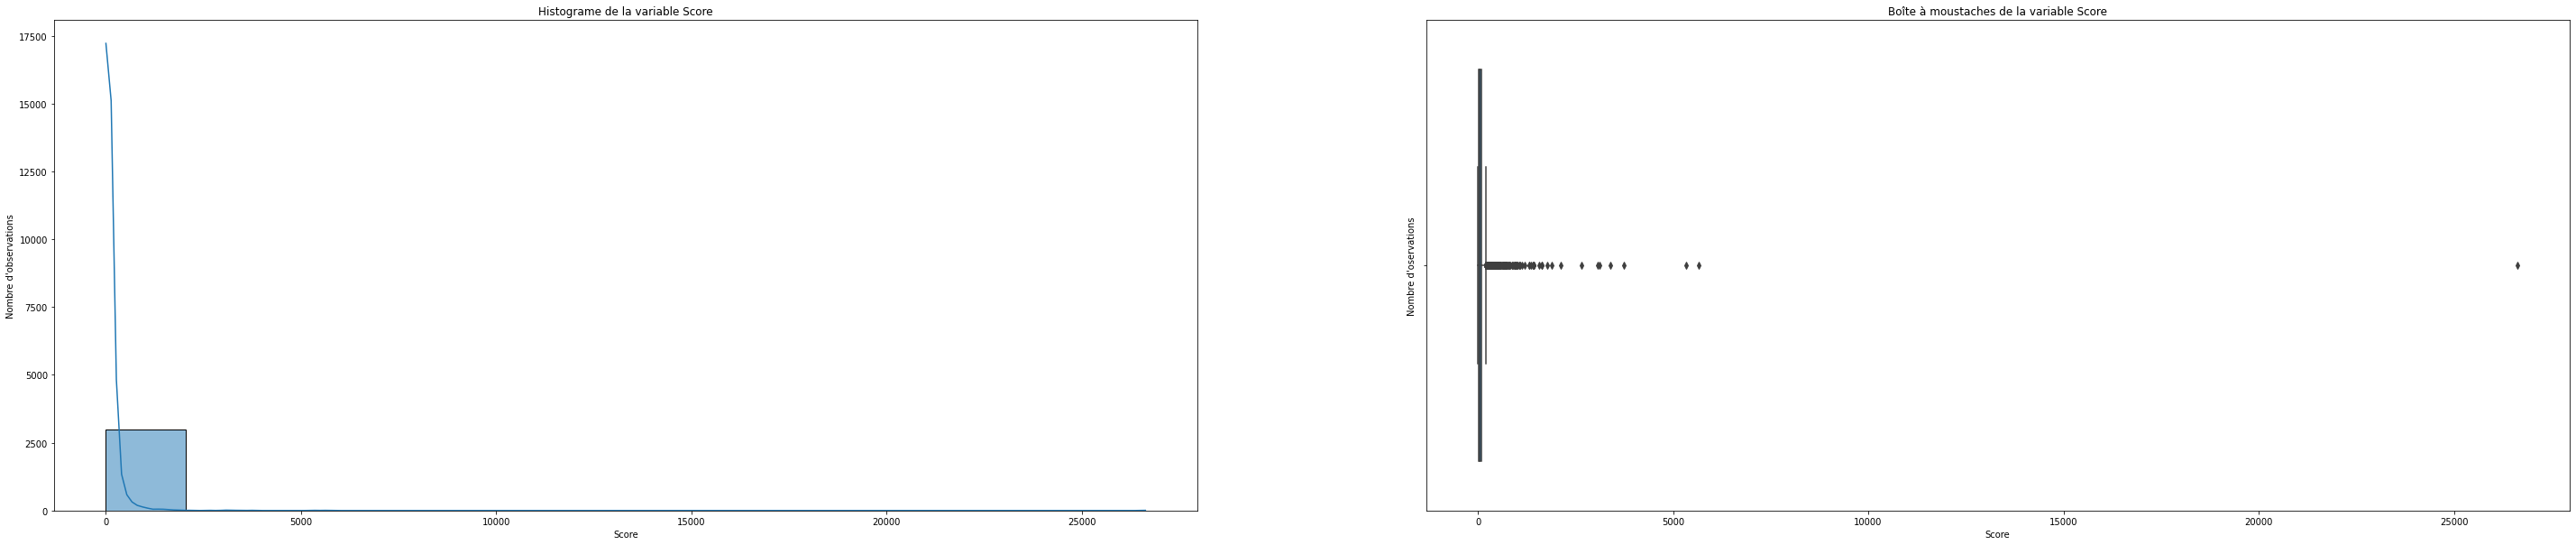


--------------------------------------------------

Indicateurs statistiques de distribution de la variable Score:


count     3000.000000
mean       116.921000
std        544.359768
min          6.000000
25%         28.750000
50%         50.000000
75%        100.000000
max      26631.000000
Name: Score, dtype: float64

In [77]:
%pylab 
%matplotlib inline
import seaborn as sns


def plot_continuous_distribution(data, col, bins='sturges'):
    """
    Plot distribution plot, box plot and statistical distribution figures
    
    Args: 
        data(DataFrame): Name of the dataframe 
        
        col(String): Name of the column to plot
        
    Returns:
        Variable distribution plots and figures
    """
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(50,10))
    
    sns.histplot(data=data, x=col, bins='sturges', kde=True, ax=ax[0])
    ax[0].set_xlabel(f"{col}")
    ax[0].set_ylabel("Nombre d'observations")
    ax[0].set_title(f"Histograme de la variable {col}")
    
    sns.boxplot(data=data, x=col)
    ax[1].set_xlabel(f"{col}")
    ax[1].set_ylabel("Nombre d'oservations")
    ax[1].set_title(f"Boîte à moustaches de la variable {col}")
    plt.show()
    
    print("\n" + "-" * 50 + "\n")
    print(f"Indicateurs statistiques de distribution de la variable {col}:")
    display(data[col].describe())
    
    
plot_continuous_distribution(data=data, col='Score')

Viewcount

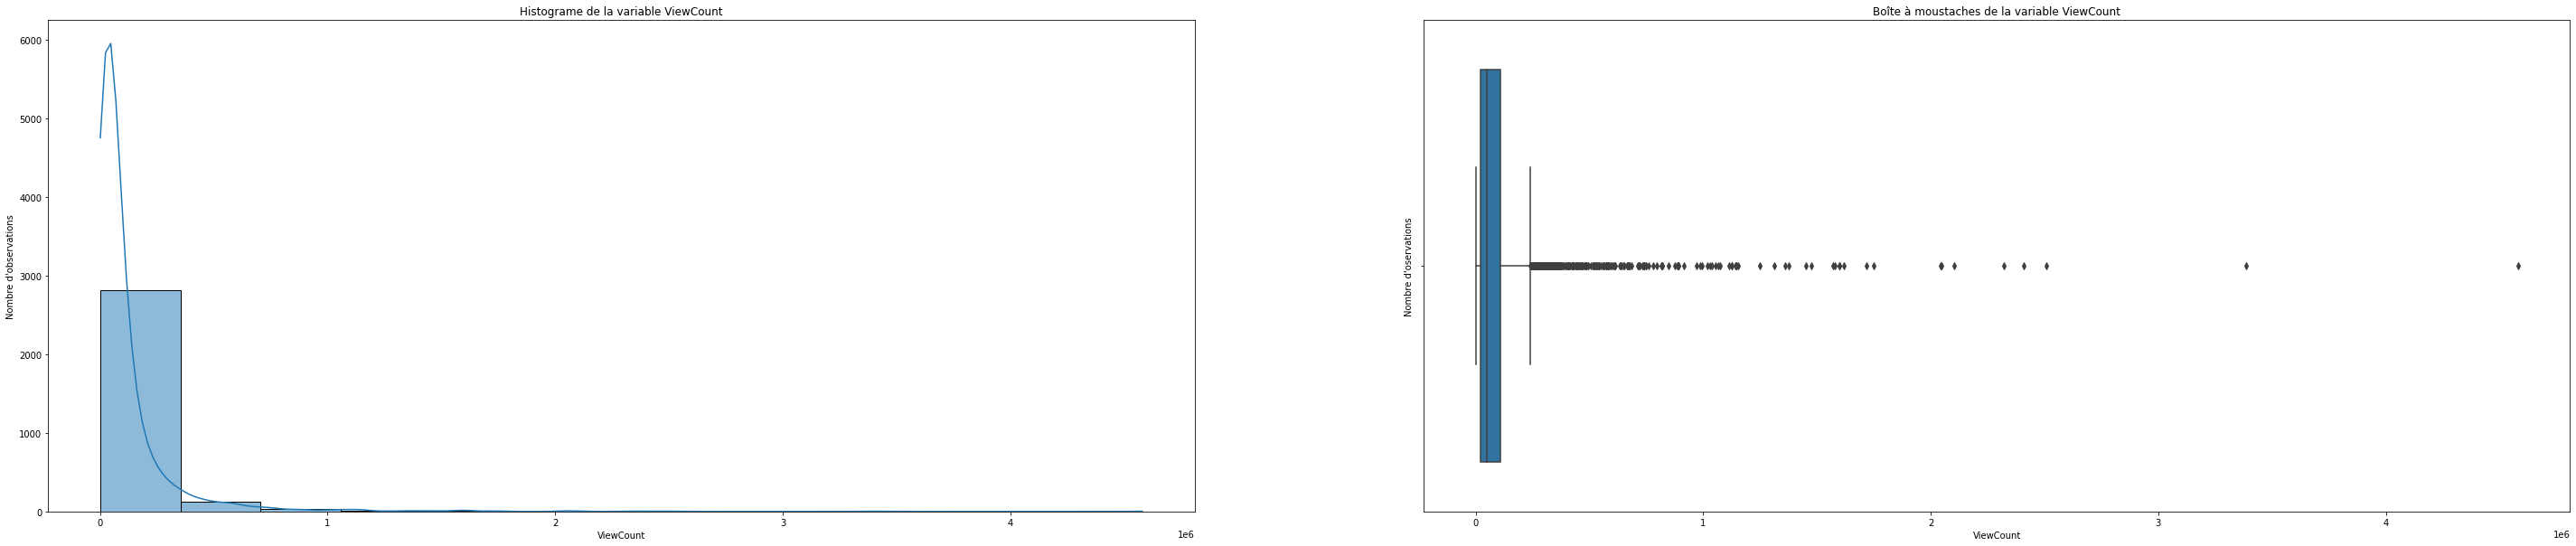


--------------------------------------------------

Indicateurs statistiques de distribution de la variable ViewCount:


count    3.000000e+03
mean     1.115768e+05
std      2.220019e+05
min      8.510000e+02
25%      2.155225e+04
50%      4.890850e+04
75%      1.095912e+05
max      4.580670e+06
Name: ViewCount, dtype: float64

In [78]:
plot_continuous_distribution(data=data, col='ViewCount')

Answer count

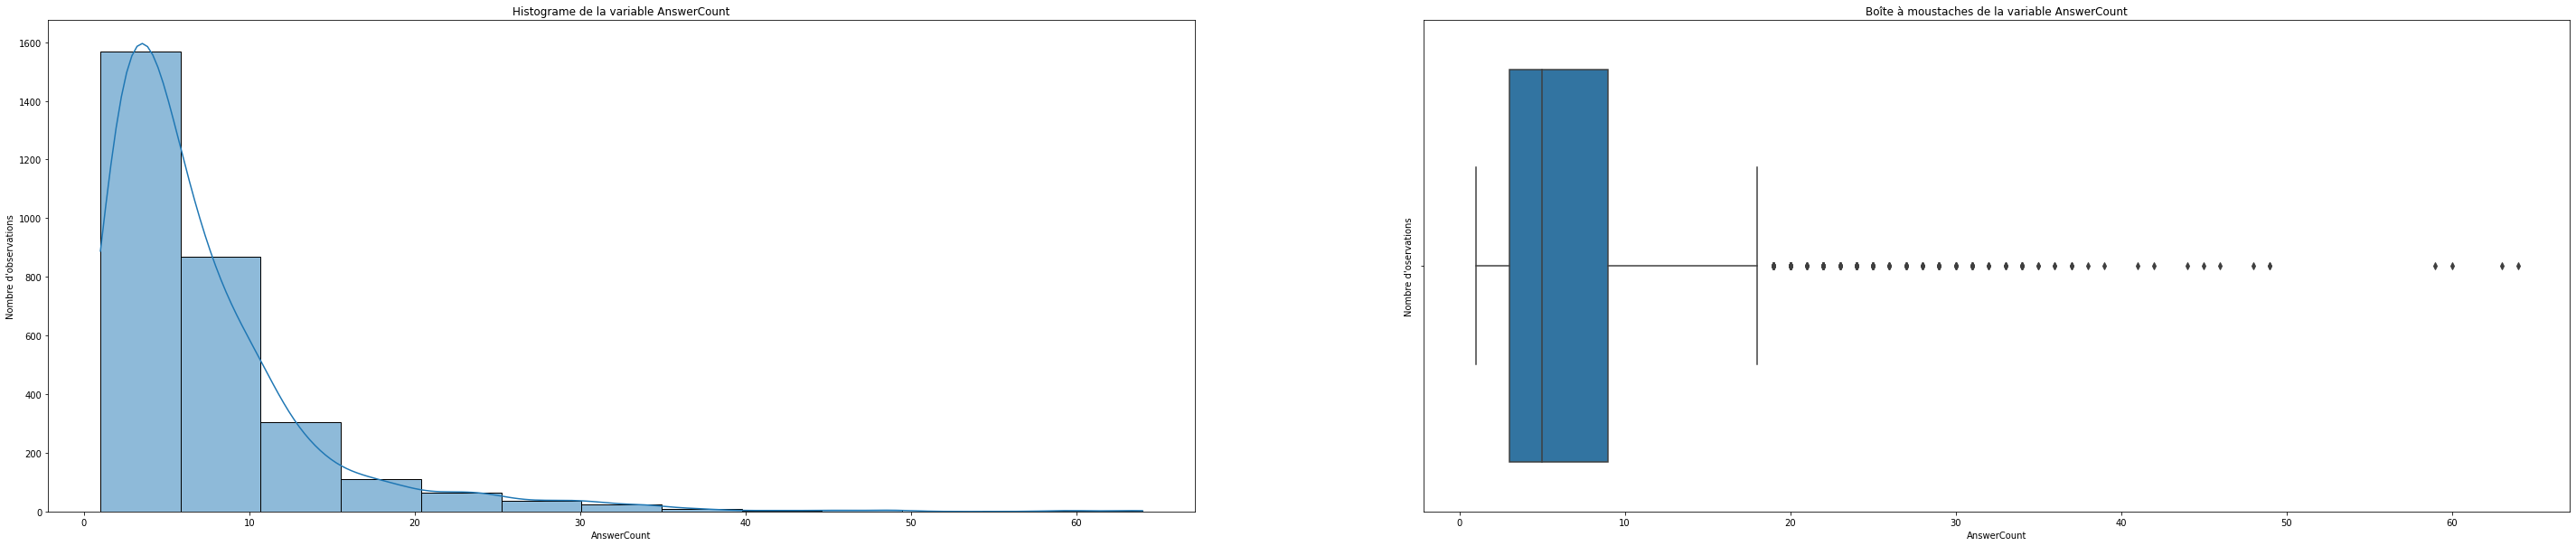


--------------------------------------------------

Indicateurs statistiques de distribution de la variable AnswerCount:


count    3000.000000
mean        7.204667
std         6.640493
min         1.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        64.000000
Name: AnswerCount, dtype: float64

In [79]:
plot_continuous_distribution(data=data, col='AnswerCount')

Favoriate count

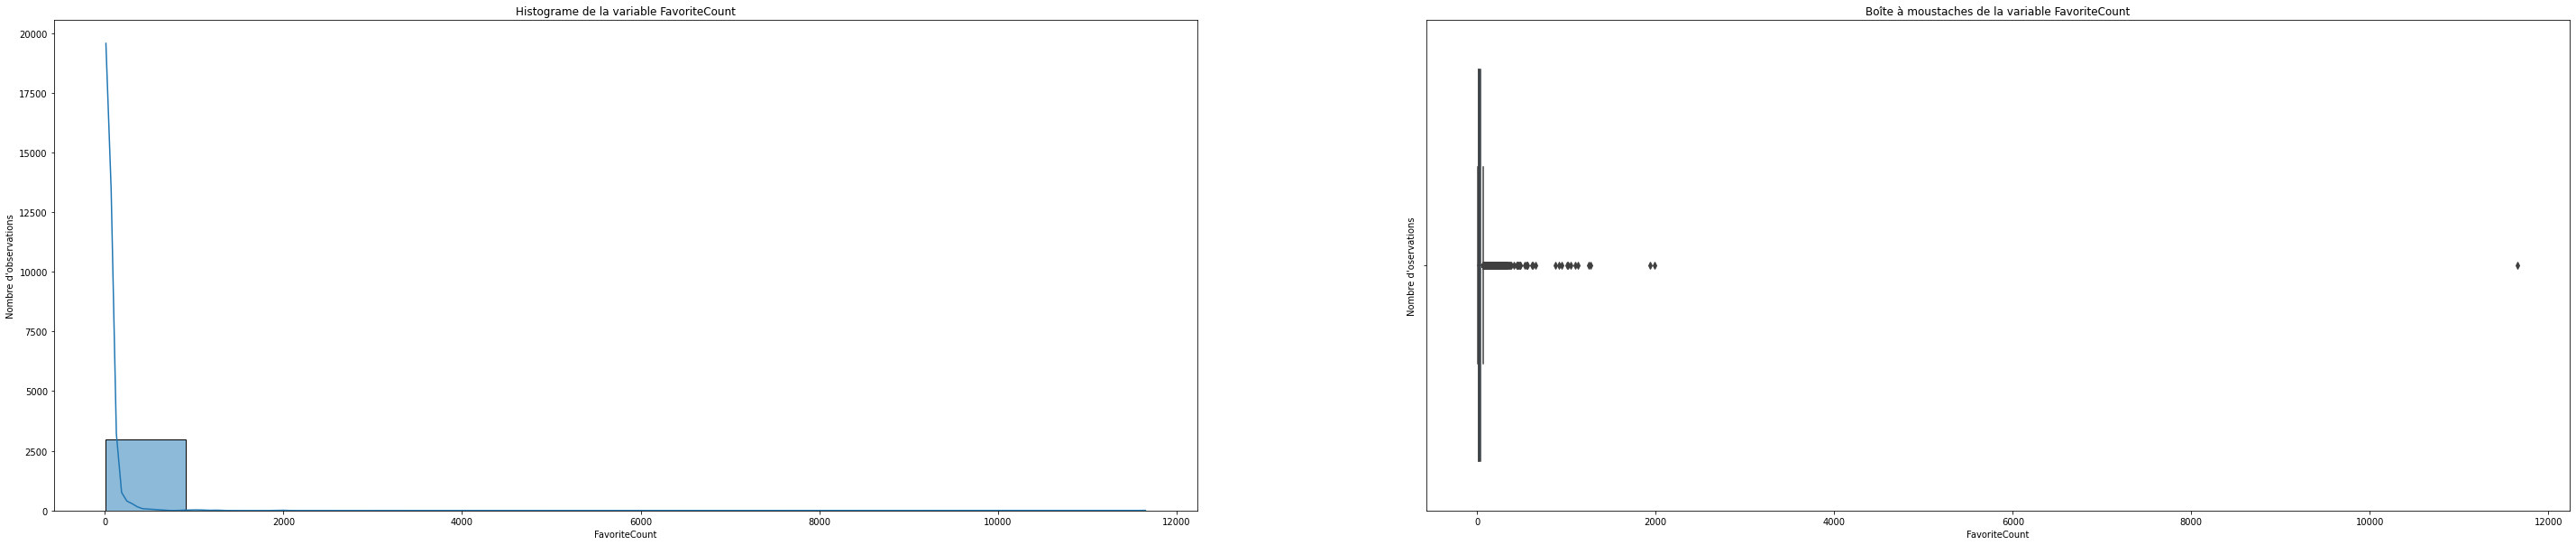


--------------------------------------------------

Indicateurs statistiques de distribution de la variable FavoriteCount:


count     3000.000000
mean        45.332000
std        232.633534
min         11.000000
25%         14.000000
50%         19.000000
75%         34.000000
max      11654.000000
Name: FavoriteCount, dtype: float64

In [80]:
plot_continuous_distribution(data=data, col='FavoriteCount')

AnswerCount 

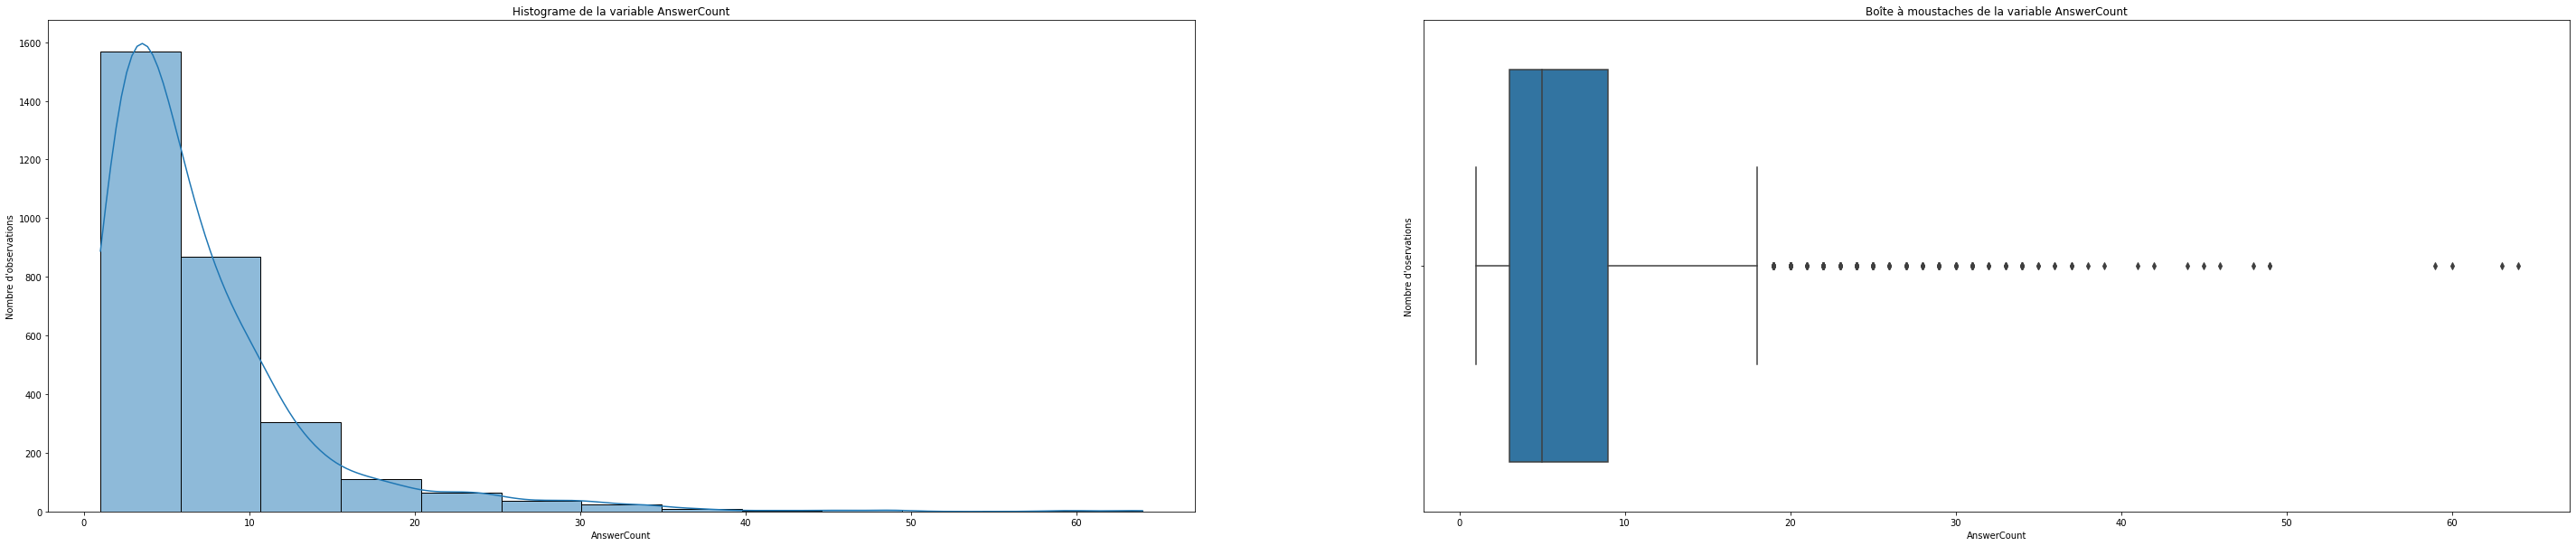


--------------------------------------------------

Indicateurs statistiques de distribution de la variable AnswerCount:


count    3000.000000
mean        7.204667
std         6.640493
min         1.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        64.000000
Name: AnswerCount, dtype: float64

In [81]:
plot_continuous_distribution(data=data, col='AnswerCount')

Correlation 

In [82]:
data.corr()

,Id,Score,ViewCount,FavoriteCount,AnswerCount
Id,1.000000,-0.045112,-0.087579,-0.048800,-0.099238
Score,-0.045112,1.000000,0.439946,0.977787,0.245313
ViewCount,-0.087579,0.439946,1.000000,0.344184,0.468301
FavoriteCount,-0.048800,0.977787,0.344184,1.000000,0.207408
AnswerCount,-0.099238,0.245313,0.468301,0.207408,1.000000


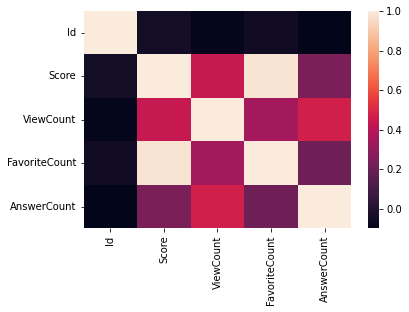

In [83]:
sns.heatmap(data.corr());

In [84]:
pwd

'/home/ping/code/public-health/stackoverflow/notebook'

In [85]:
filtered_data = data[(data['Score'] > 0) &
                           (data['AnswerCount']>0) &
                           (data['FavoriteCount']>0) &
                           (data['ViewCount']>0)]
filtered_data.sort_values(['Score', 'ViewCount'], ascending=[False, False], inplace=True)
filtered_data_prop = round((filtered_data.shape[0] / data.shape[0] * 100),2)
display(filtered_data)
print(f"Porportion de données restantes: {filtered_data_prop}%")

data.to_csv('filtered_data.csv', sep=",", index=False)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
21337,Why is processing a sorted array faster than p...,<p>Here is a piece of C++ code that shows some...,<java><c++><performance><cpu-architecture><bra...,11227809,26631,1748348,11654,27
4412,Which equals operator (== vs ===) should be us...,"<p>I'm using <a href=""http://en.wikipedia.org/...",<javascript><operators><equality><equality-ope...,359494,5651,2044417,1992,48
5742,How can I safely create a nested directory?,<p>How do I check if the directory into which ...,<python><exception><path><directory><operating...,273192,5325,3384359,1101,29
23976,Why is char[] preferred over String for passwo...,"<p>In Swing, the password field has a <code>ge...",<java><string><security><passwords><char>,8881291,3748,483707,1008,18
19510,AngularJS: Service vs provider vs factory,<p>What are the differences between a <code>Se...,<angularjs><dependency-injection><angularjs-se...,15666048,3391,780683,1939,30
...,...,...,...,...,...,...,...,...
11724,Raspberry PI - Send mail from command line usi...,<p>How can I send email from Raspberry Pi usin...,<command-line><smtp><gmail><sendmail><raspberr...,38391412,6,24288,11,1
10821,Android image filter libraries,<p>Are there any image libraries available for...,<android><graphics><image-processing><filter><...,4280162,6,22902,12,3
3065,I don't want my Excel Add-In to return an arra...,"<p>I've created an Excel Add-In, and one of th...",<c++><arrays><excel><add-in><excel-addins>,8520732,6,10751,11,2
9982,Core Data pattern: how to efficiently update l...,<p>I have some inefficiency in my app that I'd...,<iphone><performance><core-data><cocoa-design-...,2209228,6,5376,14,6


Porportion de données restantes: 100.0%


In [86]:
import pandas as pd
import numpy as np
import IPython.display

data = pd.read_csv('./filtered_data.csv', usecols=['Id','Title', 'Body', 'Tags'], index_col='Id')
data.reset_index(inplace=True)
#data.drop(columns='Id', inplace=True)
data.head(10)

,Id,Title,Body,Tags
0,1533568,What is the correct way to write HTML using Ja...,<p>It seems that experienced web developers fr...,<javascript><html><dynamic><code-generation><d...
1,24316189,Peculiar overload resolution with while (true),<p>I was implementing sync/async overloads whe...,<c#><.net><lambda><overloading><overload-resol...
2,830218,NSOperation on the iPhone,<p>I've been looking for some concrete scenari...,<iphone><objective-c><cocoa-touch><multithread...
3,47692213,Reducing size of pyinstaller exe,<p>I have a simple pandas pyinstaller exe whic...,<python><pandas><selenium><selenium-webdriver>...
4,2601978,How to check if my string is equal to null?,<p>I want to perform some action ONLY IF my st...,<java><string><null><equals><conditional-opera...
5,59503689,Could Navigation Arch Component create a false...,<p>I have a basic knowledge of memory leaks an...,<android><kotlin><memory-leaks><android-archit...
6,4906762,Is using labels in JavaScript bad practice?,<p>I just found out about using label s in Jav...,<javascript><loops><label><nested-loops><break>
7,18086048,JAX-RS: How to secure REST endpoints?,<p>I am using <code>JBoss AS</code> and <code>...,<java><rest><authentication><jboss><jax-rs>
8,4224817,Autofocus algorithm for USB microscope,<p>I'm trying to design an auto-focus system f...,<c#><algorithm><image><hardware><autofocus>
9,51456526,How to change font size in VS Code sidebar?,<p>Querying for <code>fontsize</code> in <code...,<visual-studio-code><editor><keyboard-shortcut...


In [87]:
#data.sample(20)

In [88]:
# When importing nltk for the first time, we need to also download a few built-in libraries

import nltk

#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [89]:
df['Title']

12913    What is the correct way to write HTML using Ja...
12204       Peculiar overload resolution with while (true)
642                              NSOperation on the iPhone
24282                     Reducing size of pyinstaller exe
15399          How to check if my string is equal to null?
                               ...                        
11974    How to eliminate the "maven-enforcer-plugin (g...
18726                        Merge two dataframes by index
14825    Inherit from a generic base class, apply a con...
20952                              How does weak_ptr work?
13108           Laravel: How to get last N entries from DB
Name: Title, Length: 2995, dtype: object

In [90]:
import string
string .punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [91]:
def remove_punctuation(Title):
    for punctuation in string.punctuation:
        Title = Title.replace(punctuation, '')
    return Title

In [92]:
df['clean_title'] = df['Title'].apply(remove_punctuation)

In [93]:
df['clean_title']

12913    What is the correct way to write HTML using Ja...
12204         Peculiar overload resolution with while true
642                              NSOperation on the iPhone
24282                     Reducing size of pyinstaller exe
15399           How to check if my string is equal to null
                               ...                        
11974    How to eliminate the mavenenforcerplugin goal ...
18726                        Merge two dataframes by index
14825    Inherit from a generic base class apply a cons...
20952                                How does weakptr work
13108            Laravel How to get last N entries from DB
Name: clean_title, Length: 2995, dtype: object

In [94]:
#lower case

In [95]:
clean_title = df['clean_title'].str.lower() 
df['clean_title'] = clean_title

In [96]:
df['clean_title']

12913    what is the correct way to write html using ja...
12204         peculiar overload resolution with while true
642                              nsoperation on the iphone
24282                     reducing size of pyinstaller exe
15399           how to check if my string is equal to null
                               ...                        
11974    how to eliminate the mavenenforcerplugin goal ...
18726                        merge two dataframes by index
14825    inherit from a generic base class apply a cons...
20952                                how does weakptr work
13108            laravel how to get last n entries from db
Name: clean_title, Length: 2995, dtype: object

In [97]:
#Remove numbers 

In [98]:
def remove_digits(title):
    
    clean_title = ''.join(word for word in title if not word.isdigit())
    return clean_title
   

In [99]:
df['clean_title'] = df['clean_title'].apply(remove_digits)

In [100]:
df['clean_title']

12913    what is the correct way to write html using ja...
12204         peculiar overload resolution with while true
642                              nsoperation on the iphone
24282                     reducing size of pyinstaller exe
15399           how to check if my string is equal to null
                               ...                        
11974    how to eliminate the mavenenforcerplugin goal ...
18726                        merge two dataframes by index
14825    inherit from a generic base class apply a cons...
20952                                how does weakptr work
13108            laravel how to get last n entries from db
Name: clean_title, Length: 2995, dtype: object

In [101]:
# Remove stopwords

In [102]:
clean_title

12913    what is the correct way to write html using ja...
12204         peculiar overload resolution with while true
642                              nsoperation on the iphone
24282                     reducing size of pyinstaller exe
15399           how to check if my string is equal to null
                               ...                        
11974    how to eliminate the mavenenforcerplugin goal ...
18726                        merge two dataframes by index
14825    inherit from a generic base class apply a cons...
20952                                how does weakptr work
13108            laravel how to get last n entries from db
Name: clean_title, Length: 2995, dtype: object

In [103]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [104]:
stop_words = set(stopwords.words('english')) 

In [105]:
# Create function
def remove_stopwords (title):
    tokenized = word_tokenize(title)
    without_stopwords = [word for word in tokenized if not word in stop_words]
    return without_stopwords

df['clean_title'] = df.clean_title.apply(remove_stopwords)

df.head()

,Title,Body,Tags,sentence_bow,sentence_bow_lem,clean_tag,clean_tag_lem,_len_Title,_len_Body,_len_Tags,clean_title
12913,What is the correct way to write HTML using Ja...,<p>It seems that experienced web developers fr...,<javascript><html><dynamic><code-generation><d...,seems experienced web developers frown upon us...,web developer code document.write code javascr...,< javascript > < html > < dynamic > < code gen...,javascript html code generation,55,194,60,"[correct, way, write, html, using, javascript]"
12204,Peculiar overload resolution with while (true),<p>I was implementing sync/async overloads whe...,<c#><.net><lambda><overloading><overload-resol...,implementing sync async overloads came across ...,sync async overload situation expression param...,< c > < .net > < lambda > < overloading > < ov...,.net overload resolution,46,834,52,"[peculiar, overload, resolution, true]"
642,NSOperation on the iPhone,<p>I've been looking for some concrete scenari...,<iphone><objective-c><cocoa-touch><multithread...,'ve looking concrete scenarios code nsoperatio...,scenario nsoperation code iphone tool applicat...,< iphone > < objective c > < cocoa touch > < m...,iphone objective c cocoa touch nsoperation,25,526,63,"[nsoperation, iphone]"
24282,Reducing size of pyinstaller exe,<p>I have a simple pandas pyinstaller exe whic...,<python><pandas><selenium><selenium-webdriver>...,simple pandas pyinstaller exe 40mb. exe exampl...,panda pyinstaller exe mb exe example import co...,< python > < pandas > < selenium > < selenium ...,selenium selenium webdriver,32,1886,59,"[reducing, size, pyinstaller, exe]"
15399,How to check if my string is equal to null?,<p>I want to perform some action ONLY IF my st...,<java><string><null><equals><conditional-opera...,want perform action only string meaningful val...,perform action value pre code mystring.equal c...,< java > < string > < null > < equals > < cond...,string operator,43,1022,50,"[check, string, equal, null]"


In [106]:
# Lemmatize

In [108]:
from nltk.stem import WordNetLemmatizer

In [109]:
def lemma(title):
    lemmatizer = WordNetLemmatizer() # Initiate lemmatizer
    lemmatized = [lemmatizer.lemmatize(word) for word in title] # Lemmatize
    lemmatized_string = " ".join(lemmatized)
    return lemmatized_string

df['clean_title'] = df.clean_title.apply(lemma)

df.head()

,Title,Body,Tags,sentence_bow,sentence_bow_lem,clean_tag,clean_tag_lem,_len_Title,_len_Body,_len_Tags,clean_title
12913,What is the correct way to write HTML using Ja...,<p>It seems that experienced web developers fr...,<javascript><html><dynamic><code-generation><d...,seems experienced web developers frown upon us...,web developer code document.write code javascr...,< javascript > < html > < dynamic > < code gen...,javascript html code generation,55,194,60,correct way write html using javascript
12204,Peculiar overload resolution with while (true),<p>I was implementing sync/async overloads whe...,<c#><.net><lambda><overloading><overload-resol...,implementing sync async overloads came across ...,sync async overload situation expression param...,< c > < .net > < lambda > < overloading > < ov...,.net overload resolution,46,834,52,peculiar overload resolution true
642,NSOperation on the iPhone,<p>I've been looking for some concrete scenari...,<iphone><objective-c><cocoa-touch><multithread...,'ve looking concrete scenarios code nsoperatio...,scenario nsoperation code iphone tool applicat...,< iphone > < objective c > < cocoa touch > < m...,iphone objective c cocoa touch nsoperation,25,526,63,nsoperation iphone
24282,Reducing size of pyinstaller exe,<p>I have a simple pandas pyinstaller exe whic...,<python><pandas><selenium><selenium-webdriver>...,simple pandas pyinstaller exe 40mb. exe exampl...,panda pyinstaller exe mb exe example import co...,< python > < pandas > < selenium > < selenium ...,selenium selenium webdriver,32,1886,59,reducing size pyinstaller exe
15399,How to check if my string is equal to null?,<p>I want to perform some action ONLY IF my st...,<java><string><null><equals><conditional-opera...,want perform action only string meaningful val...,perform action value pre code mystring.equal c...,< java > < string > < null > < equals > < cond...,string operator,43,1022,50,check string equal null
